# 자연어 처리 시작하기

(http://pinkwink.kr) 

* 설치 목록
    * JDK (Java SE Downloads)
    * JAVA_HOME 설정
    * JPype 설치
    * KoNLPy 설치
    * Word Cloud 설치

## 8-1. 한글 자연어 처리 기초 - KoNLPy 및 필요 모듈의 설치

* KoNLPy : **pip install konlpy**
* JPype1 : **conda install -c conda-forge jpype1** 
    * 이후 Jupyter Notebook 재실행 필요
* JDK 설치 : Java JDK로 검색해서 OS에 맞춰 설치

    * JAVA_HOME 설정 : JDK설치후, Program FIles > Java폴더 경로 복사, 시스템설정-> 고급시스템설정-> 환경변수-> Java_Home -> 경로복사

## 8-2. 한글 자연어 처리 기초

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

In [9]:
from konlpy.tag import Twitter
t = Twitter()

In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작합', '니다', '재미있어', '요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작합', 'Verb'),
 ('니다', 'Eomi'),
 ('재미있어', 'Adjective'),
 ('요', 'Eomi'),
 ('~~', 'Punctuation')]

## 8-3. 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [13]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [16]:
text = open('./data/alice.txt').read()
alice_mask = np.array(Image.open('./data/alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [17]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='nanumGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

Unknown system... sorry~~~~


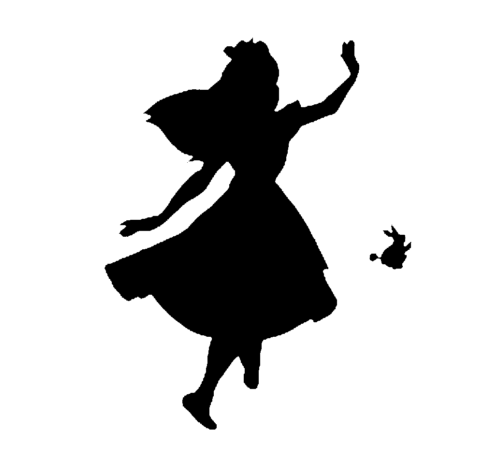

In [18]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'awfully': 0.0027397260273972603,
 'wig': 0.005479452054794521,
 'throne': 0.0027397260273972603,
 'snout': 0.0027397260273972603,
 'dark': 0.00821917808219178,
 'boldly': 0.0027397260273972603,
 'shepherd': 0.0027397260273972603,
 'Seven': 0.01643835616438356,
 'conquest': 0.0027397260273972603,
 'produced': 0.0027397260273972603,
 'weak': 0.005479452054794521,
 'simpleton': 0.0027397260273972603,
 'another moment': 0.0136986301369863,
 'Uglification': 0.005479452054794521,
 'hit': 0.005479452054794521,
 'bad': 0.005479452054794521,
 'business': 0.019178082191780823,
 'fishes': 0.0027397260273972603,
 'cart': 0.0027397260273972603,
 'think': 0.14520547945205478,
 'butter': 0.00821917808219178,
 'shouted': 0.024657534246575342,
 'man': 0.0136986301369863,
 'making': 0.021917808219178082,
 'ornamented': 0.005479452054794521,
 'returning': 0.0027397260273972603,
 'found': 0.08767123287671233,
 'Therefore': 0.0027397260273972603,
 'sad': 0.00821917808219178,
 'whiting': 0.021917808219178

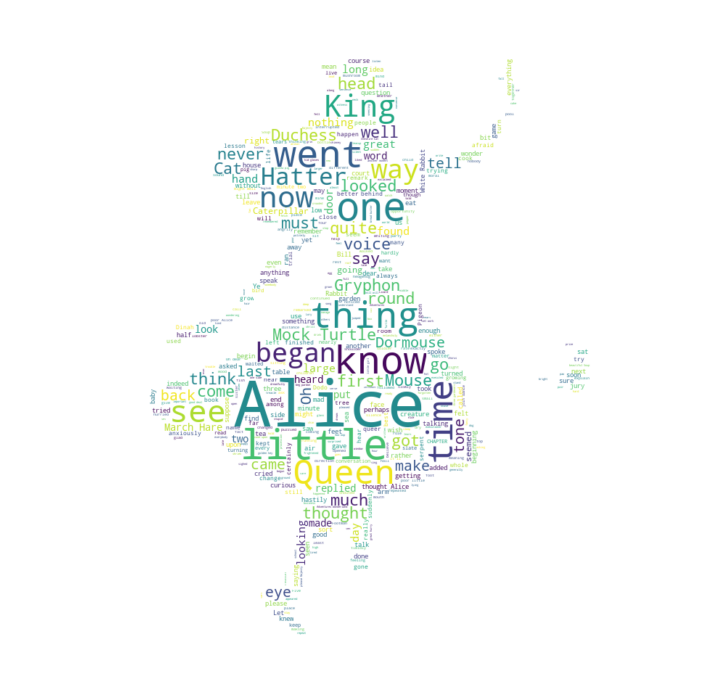

In [21]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
text = open('./data/a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/stormtrooper_mask.png'))

In [24]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [25]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [26]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

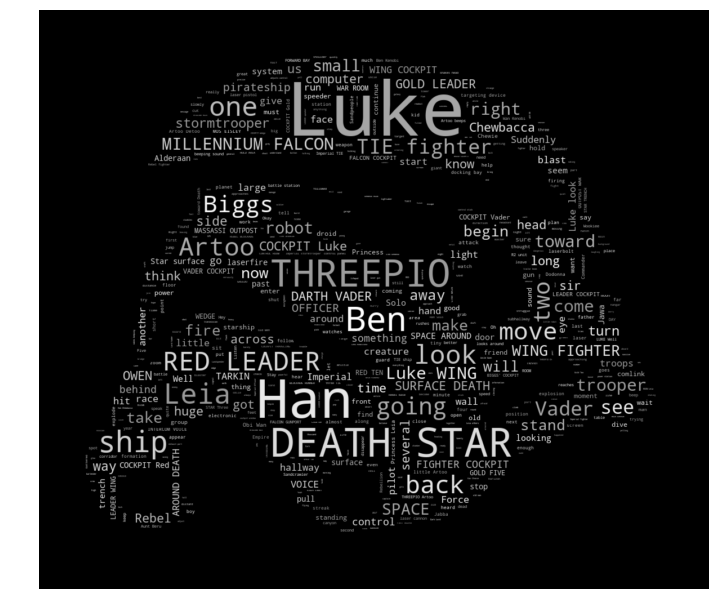

In [27]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4. 육아휴직관련 법안 대한민국 국회 제 1809890호 의안

In [28]:
import nltk

In [29]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [30]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [31]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '조제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',


In [32]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [33]:
print(len(ko.tokens))           # returns number of tokens (document length)
print(len(set(ko.tokens)))   # returns number of unique tokens
ko.vocab()                        # returns frequency distribution

735
258


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공': 1,
          '공무원': 10,
          '공포': 1,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '까지': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '년': 7,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '대상': 2,
   

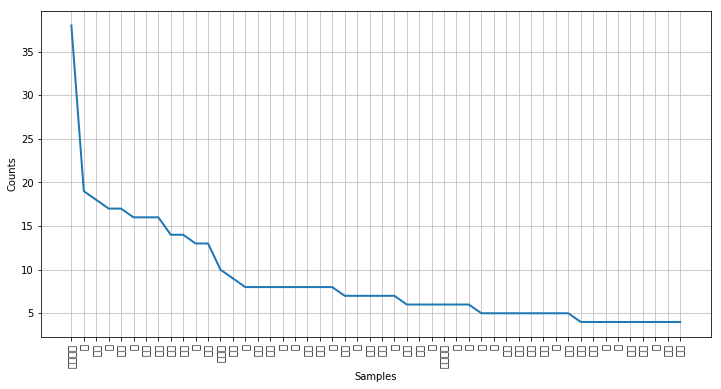

In [34]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [35]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '주요',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '조제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '조제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '조',
 '휴직',
 '생',
 '략',
 '제',
 '조',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '어',
 '느',
 '하나',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 

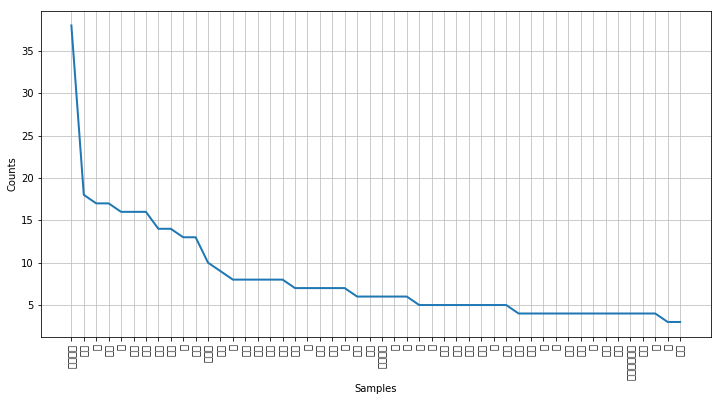

In [36]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [37]:
ko.count('초등학교')

6

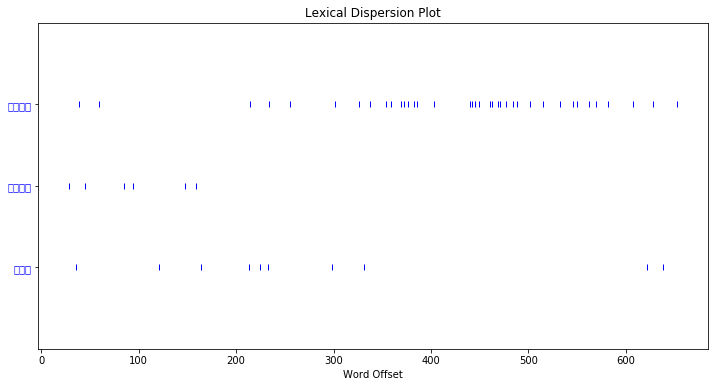

In [38]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [39]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 주요 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
필요 나이 현재 공무원 자녀 양육 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 것임
개정 법률 지방공무원법 일부 다음 개정 제 조제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 현 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년
이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위하 초등학교 학년 이하 여 여자 공무원 자녀 임신 출산 때 생 략 생 략 현행


In [40]:
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


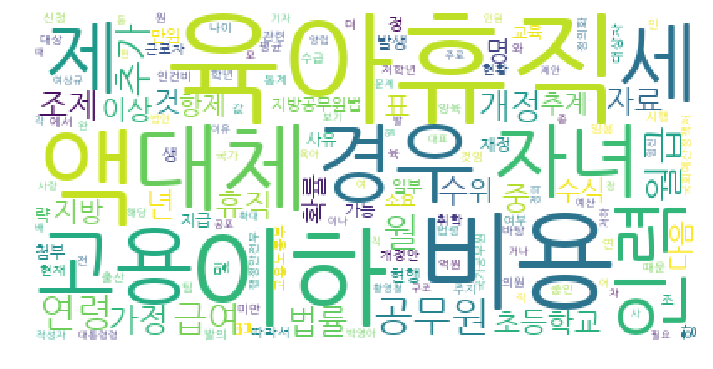

In [41]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/NanumGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 8-5. Naive Bayes Classifier의 이해 - 영문

In [42]:
from nltk.tokenize import word_tokenize
import nltk

In [43]:
train = [('i like you', 'pos'), 
         ('i hate you', 'neg'), 
         ('you like me', 'neg'),
         ('i like her', 'pos')]

In [44]:
all_words = set(word.lower() for sentence in train 
                                                            for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

In [45]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  'pos')]

In [46]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      me = False             pos : neg    =      1.7 : 1.0
                       i = True              pos : neg    =      1.7 : 1.0
                     you = True              neg : pos    =      1.7 : 1.0
                    like = True              pos : neg    =      1.7 : 1.0
                     her = False             neg : pos    =      1.7 : 1.0
                    hate = False             pos : neg    =      1.7 : 1.0


In [47]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

In [48]:
classifier.classify(test_sent_features)

'pos'

## 8-6. Naive Bayes Classifier의 이해 - 한글

In [49]:
from konlpy.tag import Twitter

In [50]:
pos_tagger = Twitter()

In [51]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [52]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

In [53]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'고양이도': False,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': True,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '이쁜': False,
   '좋아': False,
   '지루해': True},
  'neg'),
 ({'고양이도': False,
   '고양이야': True,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '이쁜': True,
   '좋아': False,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': True,
   '마치고': True,
   '메리가': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '이쁜': 

In [54]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0


In [55]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [56]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': True,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

In [57]:
classifier.classify(test_sent_features)

'neg'

In [58]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

In [59]:
train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [60]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

In [61]:
def term_exists(doc):
    return {word: (word in set(doc)) for word in tokens}

In [62]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


In [63]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [64]:
test_sentence = [("난 수업이 마치면 메리랑 놀거야")]

In [65]:
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('메리', 'Noun'),
 ('랑', 'Josa'),
 ('놀거', 'Verb'),
 ('야', 'Eomi')]

In [66]:
classifier.show_most_informative_features()

Most Informative Features
                 메리/Noun = False             neg : pos    =      2.5 : 1.0
                  난/Noun = True              neg : pos    =      2.5 : 1.0
                고양이/Noun = False             neg : pos    =      1.5 : 1.0
            좋다/Adjective = False             neg : pos    =      1.5 : 1.0
                  도/Josa = False             neg : pos    =      1.1 : 1.0
                  는/Josa = False             neg : pos    =      1.1 : 1.0
           이쁘다/Adjective = False             neg : pos    =      1.1 : 1.0
                  고/Josa = False             neg : pos    =      1.1 : 1.0
                 마치/Noun = False             neg : pos    =      1.1 : 1.0
                  야/Josa = False             neg : pos    =      1.1 : 1.0


In [67]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('놀거', 'Verb'): False,
 ('랑', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('메리', 'Noun'): False,
 ('면', 'Josa'): False,
 ('수업', 'Noun'): False,
 ('야', 'Eomi'): False,
 ('이', 'Josa'): False}

In [68]:
classifier.classify(test_sent_features)

'pos'

## 8-7. 문장의 유사도 측정

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
vectorizer = CountVectorizer(min_df = 1)

In [71]:
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
                   '메리는 공원에서 산책하고 노는 것을 싫어해요',
                   '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
                   '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [72]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [73]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [74]:
X = vectorizer.fit_transform(contents)
num_samples, num_features = X.shape
num_samples, num_features

(4, 22)

In [75]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [76]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [77]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.45   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=2.24   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.65   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [78]:
from konlpy.tag import Twitter
t = Twitter()

In [79]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀', '러', '가고', '싶지', '만', '바쁜', '데', '어떻', '하', '죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해', '요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해', '요', '.', '이상해', '요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은',
  '데',
  '너무',
  '바빠',
  '서',
  '그러',
  '질',
  '못',
  '하고',
  '있어',
  '요']]

In [80]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
contents_for_vectorize

[' 메리 랑 놀 러 가고 싶지 만 바쁜 데 어떻 하 죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해 요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해 요 . 이상해 요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은 데 너무 바빠 서 그러 질 못 하고 있어 요']

In [81]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [82]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [83]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]], dtype=int64)

In [84]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어 요']

In [85]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [86]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

In [87]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [88]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=2.83   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [89]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [90]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
    
print('---------------------')
print(new_post_vec.toarray())

[[1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
---------------------
[[0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


In [91]:
def dist_norm(v1, v2):
    v1_normalized = v1 / sp.linalg.norm(v1.toarray())
    v2_normalized = v2 / sp.linalg.norm(v2.toarray())
    
    delta = v1_normalized - v2_normalized
    
    return sp.linalg.norm(delta.toarray())

In [92]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i

== Post 0 with dist=1.26   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.42   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.89   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.30   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [93]:
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [94]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf, idf

In [95]:
a, abb, abc = ['a'], ['a','b','b'], ['a','b','c']
D = [a,abb,abc]

print(tfidf('a', a, D))
print(tfidf('b', abb, D))
print(tfidf('a', abc, D))
print(tfidf('b', abc, D))
print(tfidf('c', abc, D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [96]:
def tfidf(t, d, D):
    tf = float(d.count(t)) / sum(d.count(w) for w in set(d))
    idf = sp.log( float(len(D))/(len([doc for doc in D if t in doc])) )
    return tf * idf

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [98]:
contents_tokens = [t.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    contents_for_vectorize.append(sentence)
    
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape
num_samples, num_features

(4, 19)

In [99]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러',
 '너무',
 '떠나고',
 '메리',
 '바빠',
 '바쁜',
 '산책',
 '싫어해',
 '싶은',
 '싶지',
 '어떻',
 '에서',
 '여행',
 '으로',
 '이상해',
 '있어',
 '하고']

In [100]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [t.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word
        
    new_post_for_vectorize.append(sentence)
    
new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀 러 가고 싶네 요 .']

In [101]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)

In [102]:
best_doc = None
best_dist = 65535
best_i = None

for i in range(0, num_samples):
    post_vec = X.getrow(i)
    d = dist_norm(post_vec, new_post_vec)
    
    print("== Post %i with dist=%.2f   : %s" %(i,d,contents[i]))
    
    if d<best_dist:
        best_dist = d
        best_i = i
        
print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== Post 0 with dist=1.03   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.13   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=1.10   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.41   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 0, dist = 1.03
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?


## 8-8. 여자 친구 선물 고르기

In [103]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

Unknown system... sorry~~~~


In [104]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [105]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    토파즈 반지   여친 생일선물   마크제이콥스 데이지러브     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 여친선물 되게 다양하게 줄 수 있는데 생리전후에는 단... 제품줘도 여친선물로 괜찮을거 같더라구요! 생리기간엔... 안심하고 여친선물 주기에 좋은걸로 추천해용! 꼭...      ',
 '  질문  20대중후반 여친선물을 하려고하는데요   2018.11.06.   20대중후반 여친선물을 하려고하는데요 파우더로 하려고해요 그... 솜있는거... 암튼 피부는 굉장히 좋은편이구요 윤기도 있고.. 하얀편이에요 파우더도 바르고요 어떤...   답변 입생로랑 입술바르는거 17.19호 가격대 무난하고 자주쓰는거라 소모가 빨라서 좋아요 고려해보삼 다이아로티하트 목걸이 추천합니다 7만원이고 다이아몬드...      ',
 '  질문  여친 선물을 뭘로 해야할까요?   2019.03.31.   안녕하세요 여친과 사귄지 얼마안된 픗내기 남친입니다. 제 여친의 생일이 얼마 안남았는데 어떻게 해야하는지 모르겠어요. 여친의 마음을 감동시켜줄려면 어떻게 해야...   답변 건조하고 미세먼지가 많은 요즘에는 토닥토닥워터 너의이름은장미를 추천해요 장미와 건조레몬,딸기,히비스커스등이 블랜딩 되어 있어 상큼하고 맛있게 먹을수 있어요...      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.

In [106]:
#from tqdm import tqdm_notebook

present_candi_text = []

for n in range(1, 1000, 10):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))

    soup = BeautifulSoup(response, "html.parser")

    tmp = soup.find_all('dl')

    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [107]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구 생일선물   여자 근력운동   여자친구 100일 선물   10대 여자친구 선물   와일드망고   친구 선물   여자친구 목걸이   스킨케어   여자 30대 선물   20대 여자친구 선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대 여자친구 선물로 친환경 화장품 좋은것좀!   3일 전   20대 여자친구 선물로 친환경 화장품을 하나 구입해주려고 하는데요 건성타입을... 그러한 친환경 화장품 이었음 좋을것같답니다 . 20대 여자친구 선물 어떤것이 좋나요!!   답변 20대 여자친구 선물로 줄 만한 상품이라면 크림 같은... 20대 여자친구 선물로 탁월한 거 같네요 어떠한... 20대 여자친구 선물로 사주었는데 정말 보습지속력도 남다르고...      ',
 '  질문  20대 여자친구 선물 고민   2019.04.03.   20대 여자친구 선물은 뭐가 괜찮을까요?? 제가 센스가 없어서 괜히 이상한거 사주면 안... 20대 여자친구 선물 뭐 갖고싶은지 물어봐도 말을 안해줘서요;;; 도와주세요ㅠㅠ   답변 20대 여자친구 선물 고르는 센스가 부족해서... 20대 여자친구 선물 될 거에요! 화장품 하시면 되게... 20대 여자친구 선물 센스있어보일수있는 기회에요;) 가격대가...      ',
 '  질문  여자친구 선물 추천 해주실분~~   2019.03.04.   있으면 여친 생일이라서 차근차근 준비 중이에요. 여자친구 선물 추천 받고 준비하려고 합니다. 여친이 좋아할 만한 것들이 있다면 여자친구 선물 추천 해주심 감사드려요!!   답변 남사친들이 여자친구 선물 추천 부탁할 때면 저는 무조건

In [108]:
len(present_candi_text)

1300

In [109]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [110]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [111]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함하는',
 '단어',
 '(+)',
 '제외하는',
 '단어',
 '(-)',
 '기본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이',
 '고자',
 '할',
 '때',
 '사용합',
 '니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분해서',
 '입력하세',
 '요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100',
 '일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '와일드',
 '망고',
 '친구',
 '선물',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주일',
 '간',
 '유지됩',
 '니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시',
 '겠',
 '습니까',
 '?',
 '열기',
 '질문',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '친환경',
 '화장품',
 '좋',
 '은',
 '것좀',
 '!',
 '3',
 '일',
 '전',
 '20',
 '대',
 '여자친구',
 '선물',
 '로',
 '친환경',
 '화장품',
 '을',
 '하나',
 '구입',
 '해주려',
 '고',
 '하는',
 '데요',
 '건성',
 '타입',
 '을',
 '...',
 '그러한',
 '친환경',
 '화장품',
 '이었음',
 '좋',
 '을'

In [112]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

97700
387


In [113]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 6100),
 ('여자친구', 5800),
 ('.', 4000),
 ('...', 3100),
 ('대', 2200),
 ('로', 2000),
 ('요', 1600),
 ('을', 1500),
 ('20', 1300),
 ('가', 1300),
 ('이', 1200),
 ('답변', 1200),
 ('화장품', 1100),
 ('질문', 1100),
 ('추천', 1000),
 ('도', 900),
 ('고', 900),
 ('30', 800),
 ('좋', 800),
 ('2019', 800),
 ('면', 800),
 ('거', 800),
 ('데', 700),
 ('것', 700),
 ('만', 700),
 ('은', 700),
 ('하는', 700),
 ('고민', 600),
 ('04', 600),
 ('는', 500),
 (',', 500),
 ('를', 500),
 ('단어', 500),
 ('니다', 500),
 ('주', 500),
 ('한', 500),
 ('줄', 500),
 ('일', 400),
 ('때', 400),
 ('에요', 400),
 ('인데', 400),
 ('으로', 400),
 ('여자', 400),
 ('다', 400),
 ('들', 400),
 ('검색', 400),
 ('귀걸이', 400),
 ('세요', 400),
 ('있', 400),
 ('?', 300),
 ('있으', 300),
 ('나', 300),
 ('생일', 300),
 ('뭐', 300),
 ('50', 300),
 ('추천해', 300),
 ('친환경', 300),
 ('1', 300),
 ('많이', 300),
 ('피부', 300),
 ('안', 300),
 ('!', 300),
 ('습니다', 300),
 ('센스', 300),
 ('괜찮', 300),
 ('제', 300),
 ('10', 300),
 ('서', 300),
 ('목걸이', 300),
 ('일이', 300),
 ('100', 300),
 ('편지', 300),


In [114]:
ko.similar('여자친구')

무슨


In [115]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                                                         if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6100),
 ('여자친구', 5800),
 ('화장품', 1100),
 ('추천', 1000),
 ('면', 800),
 ('2019', 800),
 ('30', 800),
 ('만', 700),
 ('고민', 600),
 ('04', 600),
 ('에요', 400),
 ('검색', 400),
 ('귀걸이', 400),
 ('세요', 400),
 ('여자', 400),
 ('안', 300),
 ('친환경', 300),
 ('!', 300),
 ('센스', 300),
 ('나', 300),
 ('생일', 300),
 ('괜찮', 300),
 ('편지', 300),
 ('50', 300),
 ('추천해', 300),
 ('일이', 300),
 ('많이', 300),
 ('목걸이', 300),
 ('있으', 300),
 ('100', 300),
 ('피부', 300),
 ('저', 300),
 ('01', 300),
 ('서', 300),
 ('엄청', 200),
 ('03', 200),
 ('서요', 200),
 ('월', 200),
 ('준비', 200),
 ('꽃', 200),
 ('중이', 200),
 ('고르는', 200),
 ('ㅠㅠ', 200),
 ('예쁜', 200),
 ('하시', 200),
 ('해주', 200),
 ('라고요', 200),
 ('같아', 200),
 ('15000', 200),
 ('제품', 200)]

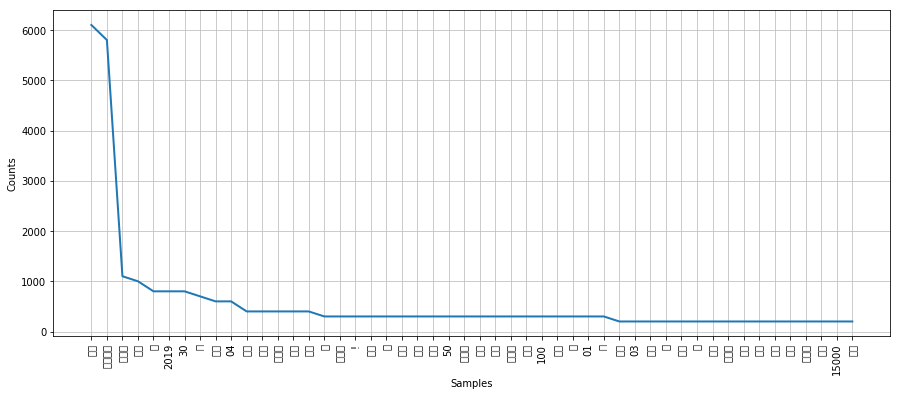

In [116]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [124]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [125]:
data = ko.vocab().most_common(300)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

OSError: cannot open resource

In [126]:
mask = np.array(Image.open('./data/heart.jpg'))

from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(mask)

In [123]:
data = ko.vocab().most_common(200)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

OSError: cannot open resource

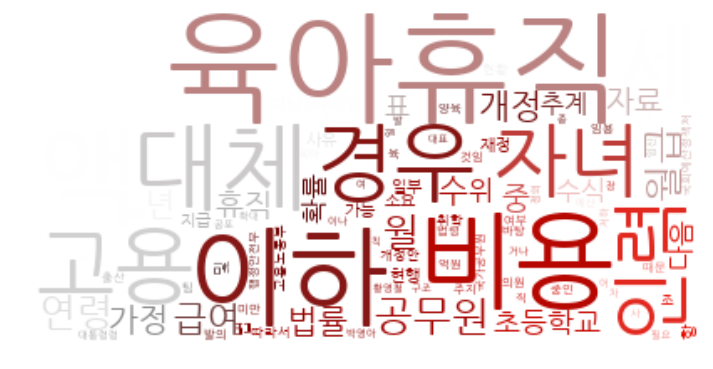

In [127]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

* gensim install : **pip install gensim**

In [128]:
import gensim
from gensim.models import word2vec

In [129]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁

질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 

질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5

질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 

질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 

질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 

질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5

질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01

질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것

연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 0

기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁

질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만

질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하

질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 

질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것 같다 전문가
질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 

질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여

질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 그렇다 여자친구 선물 답변 마치다 하다 화장품
질문 여자친구 선물 추천 부탁드리다 2019 04 23 여자친구 생일 무슨 선물 하다 되다 모르다 피부 관리 쪽 선물 하다 하다 여자친구 선물 괜찮다 것 있다 추천 부탁드리다 답변 여자친구 선물 용 고 주파 마사지 기르다 찾아보다 있다 비용 저렴 기능 여자친구 선물 피부관리 회원 권 선물 하다 것 좋다 것

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준비 하다 하다 여친 좋아하다 만 것 들 있다 여자친구 선물 추천 해 주심 감사 드리다 답변 남사 친 들 여자친구 선물 추천 부탁 하다 때 저 무조건 이 거 여자친구 선물 추천 하다 100 이면 100 다 들다 엄청 좋아하다 그래서 여자친구 선물 추천 해드리다
질문 여자친구 선물 알다 2019 01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 몰르다 서요 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순하다 화장품 있다 답변 여

질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만 상품 이 라면 크림 같다 20 대다 여자친구 선물 탁월하다 거 같다 어떠하다 20 대다 여자친구 선물 사다 정말 보습 지속 력 남 다르다
질문 20 대다 여자친구 선물 고민 2019 04 03 20 대다 여자친구 선물 뭐 괜찮다 제 센스 없다 괜히 이상하다 사주면 안 20 대다 여자친구 선물 뭐 갖다 물어보다 말 안 해주다 서요 도와주다 ㅠㅠ 답변 20 대다 여자친구 선물 고르다 센스 부족하다 20 대다 여자친구 선물 되다 거 화장품 하다 되게 20 대다 여자친구 선물 센스 있다 보이다 기회 가격 대가
질문 여자친구 선물 추천 해주다 분 2019 03 04 있다 여친 생일 차근차근 준비 중이 여자친구 선물 추천 받다 준

질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여자친구 선물 와일드 망고 친구 선물 여자친구 목걸이 스킨 케어 여자 30 대다 선물 20 대다 여자친구 선물 닫다 후 1 주일 간 유지 되다 연관검색어 다시 보다 열기
질문 20 대다 여자친구 선물 친환경 화장품 좋다 것좀 3 일 전 20 대다 여자친구 선물 친환경 화장품 하나 구입 해주다 하다 건성 타입 그러하다 친환경 화장품 좋다 같다 20 대다 여자친구 선물 어떻다 좋다 답변 20 대다 여자친구 선물 줄 만

질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하다 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 생일 선물 여자 근력 운동 여자친구 100 일 선물 10 대다 여

질문 여자친구 선물 예쁘다 추천 하다 2018 10 29 여자친구 선물 고민 달랑 과자 주기 그렇다 고급스럽다 걸 주다 여자친구 선물 과자 줄 만 예쁘다 여자친구 선물 좀 추천 하다 답변 여자친구 선물 뭘줄 고민 이신 가보다 하다 있다 여자친구 선물 고르다 기 차다 힘들다 저 SNS 인기 많다 제품 여자친구 선물 주시
질문 30 대다 여자친구 선물 질문 이 2019 01 30 30 대다 여자친구 선물 화장품 사주 려고 하다 피부 갑자기 많이 상 하다 요즘 하다 30 대다 여자친구 선물 피부 뒤집어지다 상 하다 때 좋다 화장품 시술 뭐 있다 답변 30 대다 여자친구 선물 화장품 고민 중이 신가 보다 30 대다 여자친구 선물 이렇다 상황 이 라면 성분 안전하다 30 대다 여자친구 선물 이 퓨어 플라워 라인 선물 해보다 심 괜찮다
질문 5 월 1 일이 50 일 여자친구 선물 2019 04 11 5 월 1 일이 50 일 여자친구 선물 중학생 줄 한 거 추천 하다 답변 목걸이 아니다 꽃 눠 좋다 같다 50 일이 상대 부담스럽다 하다 수 있다 크게 준비 안 하다 좋다 여자 들 보통 향수 핸드 크림 꽃
질문 여자친구 선물 하다 하다 귀걸이 추천 해주다 2019 01 16 여자친구 선물 하다 위 하다 귀걸이 알아보다 있다 여기저기 여자친구 선물 하다 한 귀걸이 추천 받다 혹시 여자친구 선물 귀걸이 해주 신분 답변 답변 저 여자친구 선물 해주다 위 하다 오랜 기간 고민 하다 제 친하다 여사 친 제품 여자친구 선물 해주 추천 하다 그래서 바로 사이트 들어가다
질문 여자친구 선물 2019 04 10 여자친구 선물 조언 좀 해주다 돈 진짜 없다 ㅠㅠ 15000 원정 있다 편지 엄청 좋아하다 편지 물론 쓸다 15000 원 상한 살 만 한겅 생각 해봤다 편지 답변 바이 흠앤 제입 다 소중하다 선물 다 좋아하다 껍니 가격 대 맞다 쇠 아니다 실버 목걸이 소개 드리다 https://m.smartstore.naver.com/byhum4/products/2764473285
기본 검색 입력 하

In [130]:
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [131]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, 
                                                                        min_count=2, sg=1)
model.save('pres_girl.model')

In [132]:
model = word2vec.Word2Vec.load("pres_girl.model")

In [133]:
model.most_similar(positive=['선물'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.7490504384040833),
 ('대다', 0.32819387316703796),
 ('10', 0.30337798595428467),
 ('30', 0.2898767292499542),
 ('닫다', 0.27655380964279175),
 ('괜찮다', 0.27449876070022583),
 ('답변', 0.26985347270965576),
 ('고민', 0.26347115635871887),
 ('마사지', 0.26203182339668274),
 ('기르다', 0.2572568655014038)]

In [134]:
model.most_similar(positive=['여자친구'])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.749050498008728),
 ('대다', 0.3279125690460205),
 ('고민', 0.3262726962566376),
 ('30', 0.31554946303367615),
 ('이', 0.3066115081310272),
 ('제', 0.2934732437133789),
 ('10', 0.2818618714809418),
 ('화장품', 0.27515092492103577),
 ('같다', 0.27122068405151367),
 ('01', 0.2703225612640381)]